In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install keras_tuner

     |████████████████████████████████| 71kB 5.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=6c6e0d1f8899f3e15a831b2988f6bc6117c5ae393284a2431d5a8d1b4b5dfd7d
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=a5a6f6dd2ab722f70d964ec26b3ba7f37238ae221a5b42d58daf04aee7d4b371
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [3]:
df = pd.read_csv ('./heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.sample (5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0


In [6]:
frame = []
frame.append (df)
col = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
for column in col:
  col_name = column
  col_name = pd.DataFrame()
  col_name = (pd.get_dummies(df[column], drop_first = True))
  frame.append (col_name)

In [7]:
dummy_df = pd.concat (frame, axis = 1)

In [8]:
dummy_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,1,1,2,3,1,1,2,1,1,2,1,2,3,4,1,2,3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1


In [9]:
dummy_df.drop(col, axis=1, inplace = True)

In [10]:
dummy_df.drop (columns=['output'], inplace=True)

In [11]:
y_label = df.output

In [12]:
dummy_df.shape

(303, 22)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (dummy_df, y_label, test_size = 0.2)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform (x_train)
x_test = sc.fit_transform (x_test)

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

In [16]:
def build_model (hp):
  model = Sequential([
                      Dense (units = hp.Int('Dense_1_layers', min_value = 16, max_value = 64, step = 16), kernel_initializer='he_uniform', activation='relu', input_dim = dummy_df.shape[1]),
                      Dense (units = hp.Int('Dense_1_layers', min_value = 16, max_value = 64, step = 16), kernel_initializer='he_uniform', activation='relu'),
                      Dense (units=1, activation='sigmoid')
  ])
  model.compile (optimizer = tf.keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2, 1e-3])), loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [17]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [18]:
tuner_search = RandomSearch (build_model, objective='val_accuracy', max_trials=5, directory = 'heart', project_name = 'Heart_attack')

In [19]:
tuner_search.search (x_train, y_train, epochs = 3, validation_split = 0.1)

Trial 5 Complete [00h 00m 00s]
val_accuracy: 0.5600000023841858

Best val_accuracy So Far: 0.9200000166893005
Total elapsed time: 00h 00m 07s
INFO:tensorflow:Oracle triggered exit


In [20]:
model = tuner_search.get_best_models(num_models=1)[0]

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                1104      
_________________________________________________________________
dense_1 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 49        
Total params: 3,505
Trainable params: 3,505
Non-trainable params: 0
_________________________________________________________________


In [22]:
hist = model.fit (x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=5)

Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.3177 - accuracy: 0.8403 - val_loss: 0.2884 - val_accuracy: 0.8689
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8993 - val_loss: 0.2883 - val_accuracy: 0.8852
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9239 - val_loss: 0.2920 - val_accuracy: 0.8852
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.1502 - accuracy: 0.9407 - val_loss: 0.4136 - val_accuracy: 0.8525
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9744 - val_loss: 0.4886 - val_accuracy: 0.8361
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.0955 - accuracy: 0.9577 - val_loss: 0.4715 - val_accuracy: 0.8361
Epoch 7/10
49/49 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9758 - val_loss: 0.5268 - val_accuracy: 0.8525
Epoch 8/10
49/49 [==

In [23]:
def plot (hist):
  plt.plot (hist.history['loss'])
  plt.plot (hist.history['val_loss'])
  plt.title ('model loss')
  plt.ylabel ('accuracy')
  plt.xlabel ('epoch')
  plt.legend (['train', 'test'], loc = 'upper left')
  plt.show ()

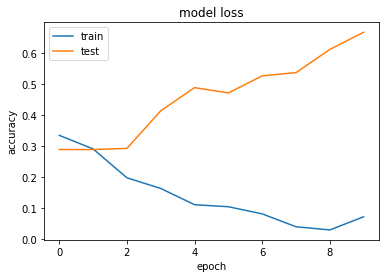

In [24]:
plot (hist)

In [43]:
# 16
# 0.01
neural_unit = 25
model1 = Sequential([
                      Dense (units=neural_unit, kernel_initializer='he_uniform', activation='relu', input_dim = dummy_df.shape[1]),
                      Dense (units=neural_unit, kernel_initializer='he_uniform', activation='relu'),
                      Dense (1, activation='sigmoid')
])
model1.compile (loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics = ['accuracy'])
model1.summary() 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 25)                575       
_________________________________________________________________
dense_30 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 26        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [44]:
hist1 = model1.fit (x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=5)

Epoch 1/10
49/49 [==============================] - 1s 5ms/step - loss: 0.7208 - accuracy: 0.6159 - val_loss: 0.2278 - val_accuracy: 0.9344
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2997 - accuracy: 0.8898 - val_loss: 0.2056 - val_accuracy: 0.9180
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2744 - accuracy: 0.9056 - val_loss: 0.1757 - val_accuracy: 0.9180
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2246 - accuracy: 0.9272 - val_loss: 0.1775 - val_accuracy: 0.9016
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.1841 - accuracy: 0.9393 - val_loss: 0.2060 - val_accuracy: 0.9344
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.1588 - accuracy: 0.9309 - val_loss: 0.2366 - val_accuracy: 0.9180
Epoch 7/10
49/49 [==============================] - 0s 3ms/step - loss: 0.1296 - accuracy: 0.9683 - val_loss: 0.2662 - val_accuracy: 0.8852
Epoch 8/10
49/49 [==

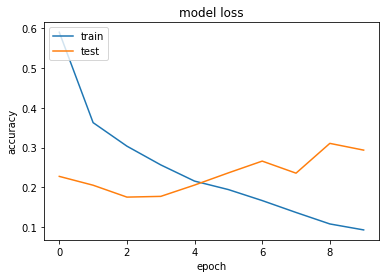

In [45]:
plot (hist1)